In [7]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio

In [179]:
def convert_to_grayscale(img : np.ndarray):
  """Function that converts an image to grayscale with standard color weights.

  Parameters
  ----------

  img : np.ndarray
    Image to be converted."""

  return to_image(0.299*img[:, :, 0] + 0.587*img[:, :, 1] + 0.114*img[:, :, 2])

def normalize(img : np.ndarray, min = 0.0, max = 1.0):
  """Function that converts an image to the given desired range.
  
  Parameters
  ----------

  img : np.ndarray
    Image to be normalized.
  min : float
    Bottom value of the new range for conversion.
  max : float
    Top value of the new range for conversion."""
  return ((img - np.min(img))/(np.max(img) - np.min(img)))*(max - min) + min

def resize(img : np.ndarray, n : int):
  """Resizes n times the image.
  
  Parameters
  ----------
  
  img : np.ndarray
    Image to be resized.
  n : int
    Resize proportion."""
  
  width, height = img.shape[0], img.shape[1]

  n_width = np.arange(0, width, n)
  n_height = np.arange(0, height, n)

  return img[n_width[:, np.newaxis], n_height]

def gray_levels(img : np.ndarray, n : int):
  imin, imax = np.min(img), np.max(img)
  levels = np.arange(imin, imax, (imax - imin)/n)

  new_img = np.copy(img)
  
  for l in range(levels.shape[0] - 1):
    new_img[np.logical_and(new_img <= levels[l + 1], new_img > levels[l])] = levels[l + 1] 

  return new_img


def rgb_to_hsv(img : np.ndarray):

  R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]

  M = np.max((R, G, B), axis = 0)
  m = np.min((R, G, B), axis = 0)

  print(M)
  print(m)
  C = M - m
  print(C)

  Hl = np.zeros(C.shape)


  print(M.shape)
  print(R.shape)

  Hl[(M - R) == 0.0] = (G - B)/C % 6
  Hl[(M - G) == 0.0] = (B-R)/C + 2
  Hl[(M - B) == 0.0] = (R - G)/C + 4
  Hl[C == 0.0] = 0.0
  
  H = 60*Hl

  V = M

  S = 0.0 + (C/V)*int(V != np.zeros(V.shape))

  return np.array([H, S, V])

def to_image(img : np.ndarray):
  """Converts an image to the 8-bit unsigned integer range

  Parameters
  ----------

  img : np.ndarray
    Image to be converted."""
  
  return normalize(img, 0.0, 255.0).astype(np.uint8)




(-0.5, 1199.5, 1599.5, -0.5)

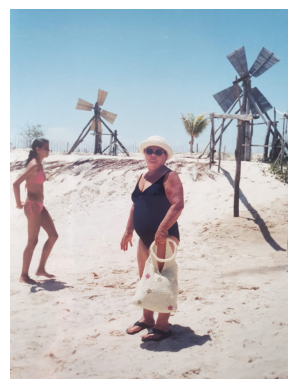

In [65]:
img = iio.imread("imagens/granny.png")

plt.imshow(img)
plt.axis("off")

(-0.5, 59.5, 79.5, -0.5)

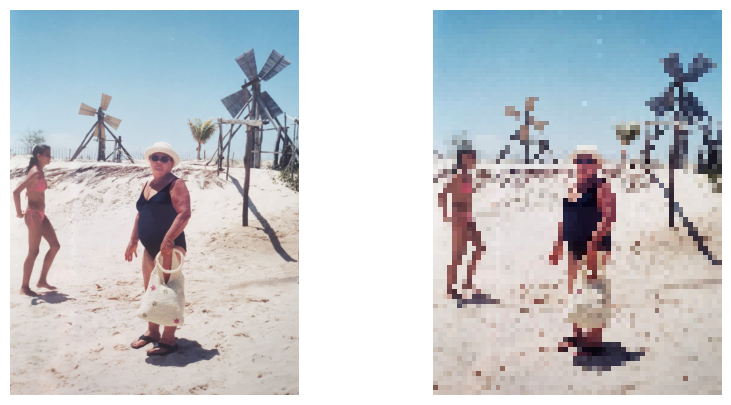

In [160]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.imshow(img)
plt.axis("off")

plt.subplot(122)
plt.imshow(to_image(resize(img, 20)), cmap = "gray")
plt.axis("off")


(1600, 1200)
[  0.  17.  34.  51.  68.  85. 102. 119. 136. 153. 170. 187. 204. 221.
 238.]


(-0.5, 1199.5, 1599.5, -0.5)

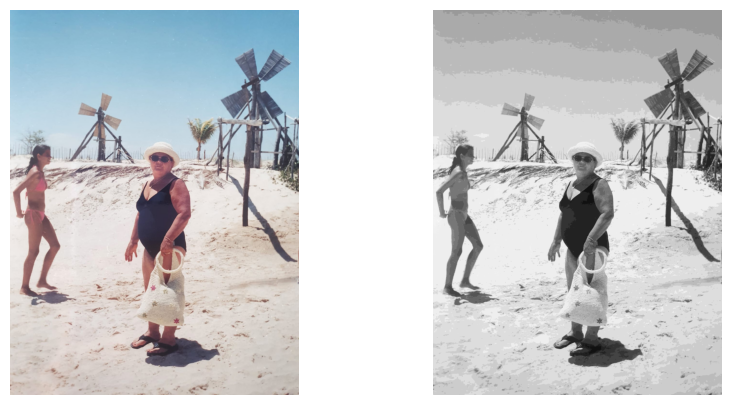

In [159]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.imshow(img)
plt.axis("off")

plt.subplot(122)
plt.imshow(to_image(gray_levels(convert_to_grayscale(img), 15)), cmap = "gray")
plt.axis("off")

In [ ]:
print(rgb_to_hsv(img))